In [2]:
import numpy as np
import opt_mo
import random

import skopt
import axelrod as axl
import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import itertools
from skopt.plots import plot_convergence

In [4]:
def bayesian(opponents, n_calls=40):
    method_params={"n_random_starts": 20, "n_calls": n_calls}
    bounds = [(0, 0.9999) for _ in range(4)]
    objective = opt_mo.optimisation.prepare_objective_optimisation(
        opponents=opponents
    )

    result = skopt.gp_minimize(
        func=objective,
        dimensions=bounds,
        acq_func="EI",
        random_state=0,
        **method_params
    )
   
    return result

**example seed $\in 2$**

In [4]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
best_response, _ = opt_mo.memory_one_best_response(random_opponents)

inf True


In [5]:
res = bayesian(random_opponents)

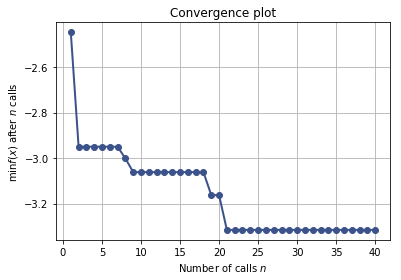

In [6]:
plot_convergence(res);

**example seed $\in$ [2]**

In [7]:
axl.seed(0)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
best_response, _ = opt_mo.memory_one_best_response(random_opponents)

inf False
inf False
inf False
inf False


KeyboardInterrupt: 

In [13]:
res = bayesian(random_opponents, n_calls=80)

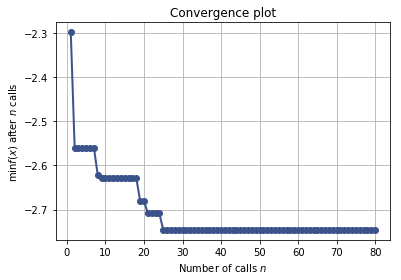

In [14]:
plot_convergence(res);

In [16]:
sorted(res.func_vals, reverse=True)[-10:]

[-2.734246709645295,
 -2.7354567899439566,
 -2.737078879092124,
 -2.737344829417163,
 -2.7378076220218786,
 -2.738253535724593,
 -2.7390505663789124,
 -2.7399243984414925,
 -2.74209658659972,
 -2.746208405497182]

**example seed $\in [3]$**

In [18]:
axl.seed(3)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
best_response, _ = opt_mo.memory_one_best_response(random_opponents)

inf True


In [19]:
res = bayesian(random_opponents)

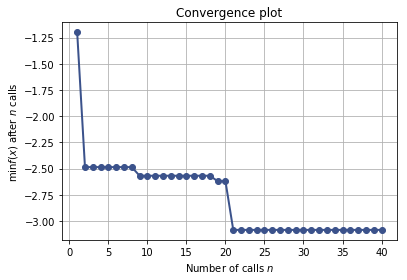

In [20]:
plot_convergence(res);

**Evolutionary case**

In [21]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
    
best_ev_response, hist = opt_mo.find_evolutionary_best_response(random_opponents, 
                                                                opt_mo.memory_one_best_response, tol=10 ** -1)

inf True


/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


inf True


/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The obj

inf True


/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The obj

inf True


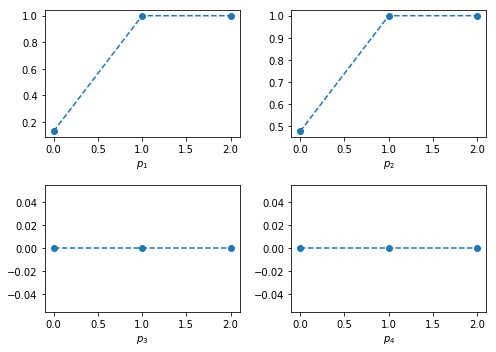

In [22]:
points = [[history[i] for history in hist] for i in range(4)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

for i in range(4):
    ax[int(i / 2), i % 2].plot(points[i], linestyle='--', marker='o')
    ax[int(i / 2), i % 2].set_xlabel(r'$p_{}$'.format(i + 1))
fig.tight_layout()

In [6]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)] + [[1, 1, 1, 1]]

In [7]:
best_response, _ = opt_mo.memory_one_best_response(random_opponents)

inf True


In [8]:
best_response

[0.12712486179399657, 0.47657604229852113, 0.0, 0.0]

In [9]:
axl.seed(2)
opponents = [[random.random() for _ in range(4)] for _ in range(2)] + [best_response] 

In [19]:
res = bayesian(opponents, n_calls=60)

/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [23]:
opt_mo.find_repeat_in_history(res.x_iters)

inf

In [44]:
for i, first_el in enumerate(res.x_iters):
    for j, second_el in enumerate(res.x_iters[i + 1:]):
        if np.allclose(first_el, second_el):
            print(i, res.x_iters[i], i + 1 + j , res.x_iters[i + 1 + j])

21 [0.0, 0.0, 0.0, 0.0] 47 [0.0, 0.0, 0.0, 0.0]
21 [0.0, 0.0, 0.0, 0.0] 49 [0.0, 0.0, 0.0, 0.0]
26 [0.9999, 0.0, 0.0, 0.0] 52 [0.9999, 0.0, 0.0, 0.0]
47 [0.0, 0.0, 0.0, 0.0] 49 [0.0, 0.0, 0.0, 0.0]


In [45]:
opt_mo.tournament_utility([0, 0, 0, 0], opponents)

-2.5437943818883926

In [49]:
opt_mo.tournament_utility([0.9999, 0, 0, 0], opponents)

-2.5437943818883806

**Multiple examples with plots**

In [50]:
best_ev_responses, histories = [], []
for seed in tqdm.tqdm(range(10, 15)):
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
    
    best_ev_response, hist = opt_mo.find_evolutionary_best_response(random_opponents, 
                                                                    opt_mo.memory_one_best_response, tol=10 ** -1)
    best_ev_responses.append(best_ev_response), histories.append(hist)



  0%|          | 0/5 [00:00<?, ?it/s]

inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False
inf False


KeyboardInterrupt: 